# Investigating the Planck Function for Blackbody Radiation#

For this exercise we will consider the Planck function describing the amount of radiant energy emitted per unit time, wavelength, area, and solid angle:

$$B_\lambda(T) = \frac{1}{\lambda^5}\frac{2hc^2}{e^{hc/(\lambda kT)}-1}$$

where $h$ is Planck's constant, $c$ is the speed of light, $k$ is Boltzmann's constant, $T$ is the black body temperature, and $\lambda$ is the photon wavelength. This function models blackbody radiation. It works especially well for near-ideal blackbodies in nature like the Sun whos radiation curve is fit by this model.

First, lets plot the function for a few different temperatures resembling the surface of the sun. 

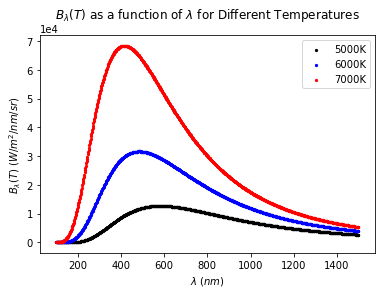

In [1]:
import numpy as np                   #import all modules required
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi

l = np.linspace(100,1500,750)
c = 3*10**8        #speed of light          #all constants were obtained from google (first result when searched)
h = 6.63*10**-34   #plancks constant
k = 1.38*10**-23   #boltzmann's constant
sig = 5.67*10**-8  #stefan-boltzmann constant
T1 = 5000          #temperatures
T2 = 6000
T3 = 7000

def planck(l,temp):                          #planck function
    numer = 2.*h*c**2/(l*10**-9)**5
    denom = np.exp(h*c/(k*temp*l*10**-9))-1
    return numer/denom

B1 = planck(l, T1)/10**9           #planck function at various temperatures divided by 10^9 because we want x in nm
B2 = planck(l, T2)/10**9
B3 = planck(l, T3)/10**9

ax1 = plt.subplot()                #plot the plancks function
ax1.scatter(l,B1, label='5000K', color='k', s=5)
ax1.scatter(l,B2, label='6000K', color='b', s=5)
ax1.scatter(l,B3, label='7000K', color='r', s=5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(r'$\lambda$ $(nm)$')
plt.ylabel(r'$B_\lambda(T)$ ($W/m^2/nm/sr$)')
plt.title(r'$B_\lambda(T)$ as a function of $\lambda$ for Different Temperatures', y=1.05 )
plt.legend()
plt.show()

I want to now show that the peaks of these functions satisfy Wien's Law. To do this, I will get a peak of the 5000K distribution and then see if it is consistent with the equation $$\lambda_{\rm max}T \simeq 0.003 ~\textrm{m K}$$.

I plotted the maximum for the 5000K distribution on the earlier graph. I multiplied the wavelength at maximum by 5000K to get $0.0029$ $m*K$. This is sufficiently close to $0.003$ $m*K$.

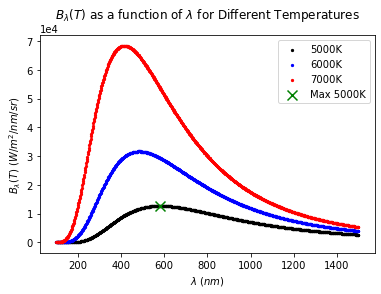

The product of the wavelength at maximum and Temperature T1 is 0.0029018691588785046 mK.


In [5]:
B1max = np.max(B1)
max_wl = l[B1.argmax()]  #wavelength of the maximum of the function at 5000K
Wiens = (max_wl*10**-9)*T1 #calculation of wiens law 

ax1 = plt.subplot()     #plot the datapoint on the curve for 5000K which shows graphically that it is indeed the max
ax1.scatter(l,B1, label='5000K', color='k', s=5)
ax1.scatter(l,B2, label='6000K', color='b', s=5)
ax1.scatter(l,B3, label='7000K', color='r', s=5)
ax1.scatter(max_wl, B1max, label='Max 5000K', marker='x',color='g', s=100)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(r'$\lambda$ $(nm)$')
plt.ylabel(r'$B_\lambda(T)$ ($W/m^2/nm/sr$)')
plt.title(r'$B_\lambda(T)$ as a function of $\lambda$ for Different Temperatures', y=1.05 )
plt.legend()
plt.show()

print('The product of the wavelength at maximum and Temperature T1 is', Wiens, 'mK.') #print the results

Finally, we want to show that the area under this curve satisfies the equation $$\int_0^\infty\, B_\lambda(T)d\lambda = \frac{\sigma T^4}{\pi}$$ which is the Stefan-Boltzmann constant as derived in Astrophysics textbooks. However, we will approximate this constant by showing that the integral converges to this value using the Planck function and various integration limits.

In [8]:
Itrue = (sig*T1**4)/pi                  #true value of the integral
I1 = quad(planck, 100, 1500, args=(T1)) #sequential evaluation of the integral with varying limits
I2 = quad(planck, 50, 3000, args=(T1))
I3 = quad(planck, 25, 6000, args=(T1))
I4 = quad(planck, 10, 8000, args=(T1))
I5 = quad(planck, 0.1, 15000, args=(T1))

print('The true value of the integral is', Itrue, 'W/m^2') #print the answer for each integral and see that it converges on 
print(r'The integral evaluated from 100 nm to 1500 nm is', I1[0]/10**9, 'W/m^2')  #the true value with each iteration.
print(r'The integral evaluated from 50 nm to 3000 nm is', I2[0]/10**9, 'W/m^2') 
print(r'The integral evaluated from 25 nm to 6000 nm is', I3[0]/10**9, 'W/m^2') 
print(r'The integral evaluated from 10 nm to 8000 nm is', I4[0]/10**9, 'W/m^2') 
print(r'The integral evaluated from 0.1 nm to 15000 nm is', I5[0]/10**9, 'W/m^2')

The true value of the integral is 11280106.591638083 W/m^2
The integral evaluated from 100 nm to 1500 nm is 9357930.82565265 W/m^2
The integral evaluated from 50 nm to 3000 nm is 10873815.035983412 W/m^2
The integral evaluated from 25 nm to 6000 nm is 11170985.393034445 W/m^2
The integral evaluated from 10 nm to 8000 nm is 11200613.32151897 W/m^2
The integral evaluated from 0.1 nm to 15000 nm is 11220297.412541812 W/m^2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
